In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [127]:
baseStation = pd.read_csv('../../Dataset/BSinfo.csv')
energy = pd.read_csv('../../Dataset/ECdata.csv')
esmodes = pd.read_csv('../../Dataset/CLdata.csv')

In [128]:
print(baseStation.shape)
print(energy.shape)
print(esmodes.shape)

(1217, 8)
(92629, 3)
(125575, 10)


In [129]:
esmodes

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,0,0.0,0.0
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,0,0.0,0.0
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,0,0.0,0.0
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,0,0.0,0.0


In [119]:
df = esmodes.copy()
df = pd.merge(df, baseStation, on=['BS','CellName'], how='left')
# df = df.drop('CellName', axis=1)
# df = df.groupby(['Time', 'BS']).mean().reset_index()
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429


In [115]:

# df['BS'] = df['BS'].str.replace('B_', '').astype(int)
# df['CellName'] = df['CellName'].str.replace('Cell', '').astype(int)
df['RUType'] = df['RUType'].str.replace('Type', '').astype(int)
df['Mode'] = df['Mode'].str.replace('Mode', '').astype(int)

In [118]:
# df = df.groupby(['Time', 'BS']).mean().reset_index()

TypeError: Could not convert Cell0 to numeric

In [130]:
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429


In [120]:
# Merge the datasets on 'BS' and 'CellName'
mergedDF = pd.merge(esmodes, baseStation, on=['BS', 'CellName'], how='inner')

# Check for any rows with duplicated 'Time' and 'BS' values
duplicated_pairs = mergedDF[mergedDF.duplicated(subset=['Time', 'BS'], keep=False)]

duplicated_pairs.sort_values(by=['Time', 'BS'])  # Display first 10 rows for clarity


,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
14559,1/1/2023 10:00,B_105,Cell0,0.22417,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,2,6.875934
119377,1/1/2023 10:00,B_105,Cell1,0.10824,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,2,6.875934
41149,1/1/2023 10:00,B_297,Cell0,0.14311,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,2,6.875934
120670,1/1/2023 10:00,B_297,Cell1,0.04718,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,426.98,10,2,6.427504
41286,1/1/2023 10:00,B_298,Cell0,0.11511,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,365.00,20,2,6.875934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122968,1/8/2023 0:00,B_583,Cell1,0.25920,0.0,0.0,0.0,0,0.0,0.0,Type3,Mode2,189.00,10,2,6.427504
81171,1/8/2023 0:00,B_584,Cell0,0.12144,0.0,0.0,0.0,0,0.0,0.0,Type3,Mode2,155.60,10,2,6.427504
123111,1/8/2023 0:00,B_584,Cell1,0.42754,0.0,0.0,0.0,0,0.0,0.0,Type3,Mode2,189.00,10,2,6.427504
81314,1/8/2023 0:00,B_585,Cell0,0.11804,0.0,0.0,0.0,0,0.0,0.0,Type3,Mode2,155.60,10,2,6.427504


In [131]:
# Group by 'Time' and 'BS' and aggregate based on the requirements
aggregated_df = df.groupby(['Time', 'BS']).agg({
    'load': 'mean',
    'TXpower': 'mean',
    'Frequency': 'max',
    'Bandwidth': 'max',
    'CellName': 'nunique',  # This will give the count of unique cells
    'ESMode1': 'first',  # Since other columns have the same values, we just take the first one
    'ESMode2': 'first',
    'ESMode3': 'first',
    'ESMode4': 'first',
    'ESMode5': 'first',
    'ESMode6': 'first',
    'RUType': 'first',
    'Mode': 'first',
    'Antennas': 'first'
}).reset_index()

# Rename the 'CellName' column to 'CellCount'
aggregated_df = aggregated_df.rename(columns={'CellName': 'CellCount'})

aggregated_df

,Time,BS,load,TXpower,Frequency,Bandwidth,CellCount,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Antennas
0,1/1/2023 10:00,B_0,0.624745,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,4
1,1/1/2023 10:00,B_1,0.028090,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type2,Mode2,4
2,1/1/2023 10:00,B_10,0.020947,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,2
3,1/1/2023 10:00,B_100,0.071930,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type4,Mode2,2
4,1/1/2023 10:00,B_101,0.016970,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type4,Mode2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118763,1/8/2023 0:00,B_792,0.264580,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,Type6,Mode2,2
118764,1/8/2023 0:00,B_793,0.095300,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,Type6,Mode2,2
118765,1/8/2023 0:00,B_794,0.138851,6.128550,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,2
118766,1/8/2023 0:00,B_795,0.537426,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,2


In [132]:
e_aggregated_df = pd.merge(aggregated_df, energy, on=['Time', 'BS'], how='left')
e_aggregated_df

,Time,BS,load,TXpower,Frequency,Bandwidth,CellCount,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Antennas,Energy
0,1/1/2023 10:00,B_0,0.624745,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,4,72.645740
1,1/1/2023 10:00,B_1,0.028090,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type2,Mode2,4,22.571001
2,1/1/2023 10:00,B_10,0.020947,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,2,31.240658
3,1/1/2023 10:00,B_100,0.071930,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type4,Mode2,2,NaN
4,1/1/2023 10:00,B_101,0.016970,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type4,Mode2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118763,1/8/2023 0:00,B_792,0.264580,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,Type6,Mode2,2,NaN
118764,1/8/2023 0:00,B_793,0.095300,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,Type6,Mode2,2,18.236173
118765,1/8/2023 0:00,B_794,0.138851,6.128550,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,2,NaN
118766,1/8/2023 0:00,B_795,0.537426,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,Type1,Mode2,2,47.234679


In [133]:
e_aggregated_df['BS'] = e_aggregated_df['BS'].str.replace('B_', '').astype(int)
e_aggregated_df['RUType'] = e_aggregated_df['RUType'].str.replace('Type', '').astype(int)
e_aggregated_df['Mode'] = e_aggregated_df['Mode'].str.replace('Mode', '').astype(int)

In [134]:
e_aggregated_df['Time'] = pd.to_datetime(e_aggregated_df['Time'], format='%d/%m/%Y %H:%M')

# Sort the dataframe by 'Time' in ascending order
sorted_df = e_aggregated_df.sort_values(by=['Time', 'BS']).reset_index(drop=True)
sorted_df


,Time,BS,load,TXpower,Frequency,Bandwidth,CellCount,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Antennas,Energy
0,2023-01-01 01:00:00,0,0.487936,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,4,64.275037
1,2023-01-01 01:00:00,1,0.034770,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,2,2,4,18.086697
2,2023-01-01 01:00:00,2,0.154011,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,4,52.615845
3,2023-01-01 01:00:00,3,0.290130,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,2,2,4,27.354260
4,2023-01-01 01:00:00,4,0.069410,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,2,2,4,17.787743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118763,2023-08-01 00:00:00,792,0.264580,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,6,2,2,NaN
118764,2023-08-01 00:00:00,793,0.095300,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,6,2,2,18.236173
118765,2023-08-01 00:00:00,794,0.138851,6.128550,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,2,NaN
118766,2023-08-01 00:00:00,795,0.537426,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,2,47.234679


In [20]:
predict_df = e_aggregated_df[e_aggregated_df['Energy'].isnull()].reset_index(drop=True)
predict_df

,Time,BS,load,TXpower,Frequency,Bandwidth,CellCount,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Antennas,Energy
0,2023-01-01 10:00:00,100,0.071930,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,4,2,2,NaN
1,2023-01-01 10:00:00,101,0.016970,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,4,2,2,NaN
2,2023-01-01 10:00:00,105,0.166205,6.875934,365.0,20,2,0.0,0.0,0.0,0,0.0,0.0,1,2,2,NaN
3,2023-01-01 10:00:00,108,0.551320,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,2,NaN
4,2023-01-01 10:00:00,117,0.203220,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,5,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26134,2023-08-01 00:00:00,786,0.455900,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,6,2,2,NaN
26135,2023-08-01 00:00:00,790,0.221300,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,6,2,2,NaN
26136,2023-08-01 00:00:00,791,0.132620,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,4,2,2,NaN
26137,2023-08-01 00:00:00,792,0.264580,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,6,2,2,NaN


In [135]:
dataset=e_aggregated_df.dropna().reset_index(drop=True)
dataset

,Time,BS,load,TXpower,Frequency,Bandwidth,CellCount,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,RUType,Mode,Antennas,Energy
0,2023-01-01 10:00:00,0,0.624745,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,4,72.645740
1,2023-01-01 10:00:00,1,0.028090,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,2,2,4,22.571001
2,2023-01-01 10:00:00,10,0.020947,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,2,31.240658
3,2023-01-01 10:00:00,102,0.107020,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,6,2,2,19.282511
4,2023-01-01 10:00:00,103,0.084820,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,6,2,2,18.236173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92624,2023-08-01 00:00:00,788,0.137090,6.875934,532.0,20,1,0.0,0.0,0.0,0,0.0,0.0,4,2,2,22.421525
92625,2023-08-01 00:00:00,789,0.321468,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,2,42.600897
92626,2023-08-01 00:00:00,793,0.095300,6.427504,189.0,10,1,0.0,0.0,0.0,0,0.0,0.0,6,2,2,18.236173
92627,2023-08-01 00:00:00,795,0.537426,6.875934,365.0,20,1,0.0,0.0,0.0,0,0.0,0.0,1,2,2,47.234679


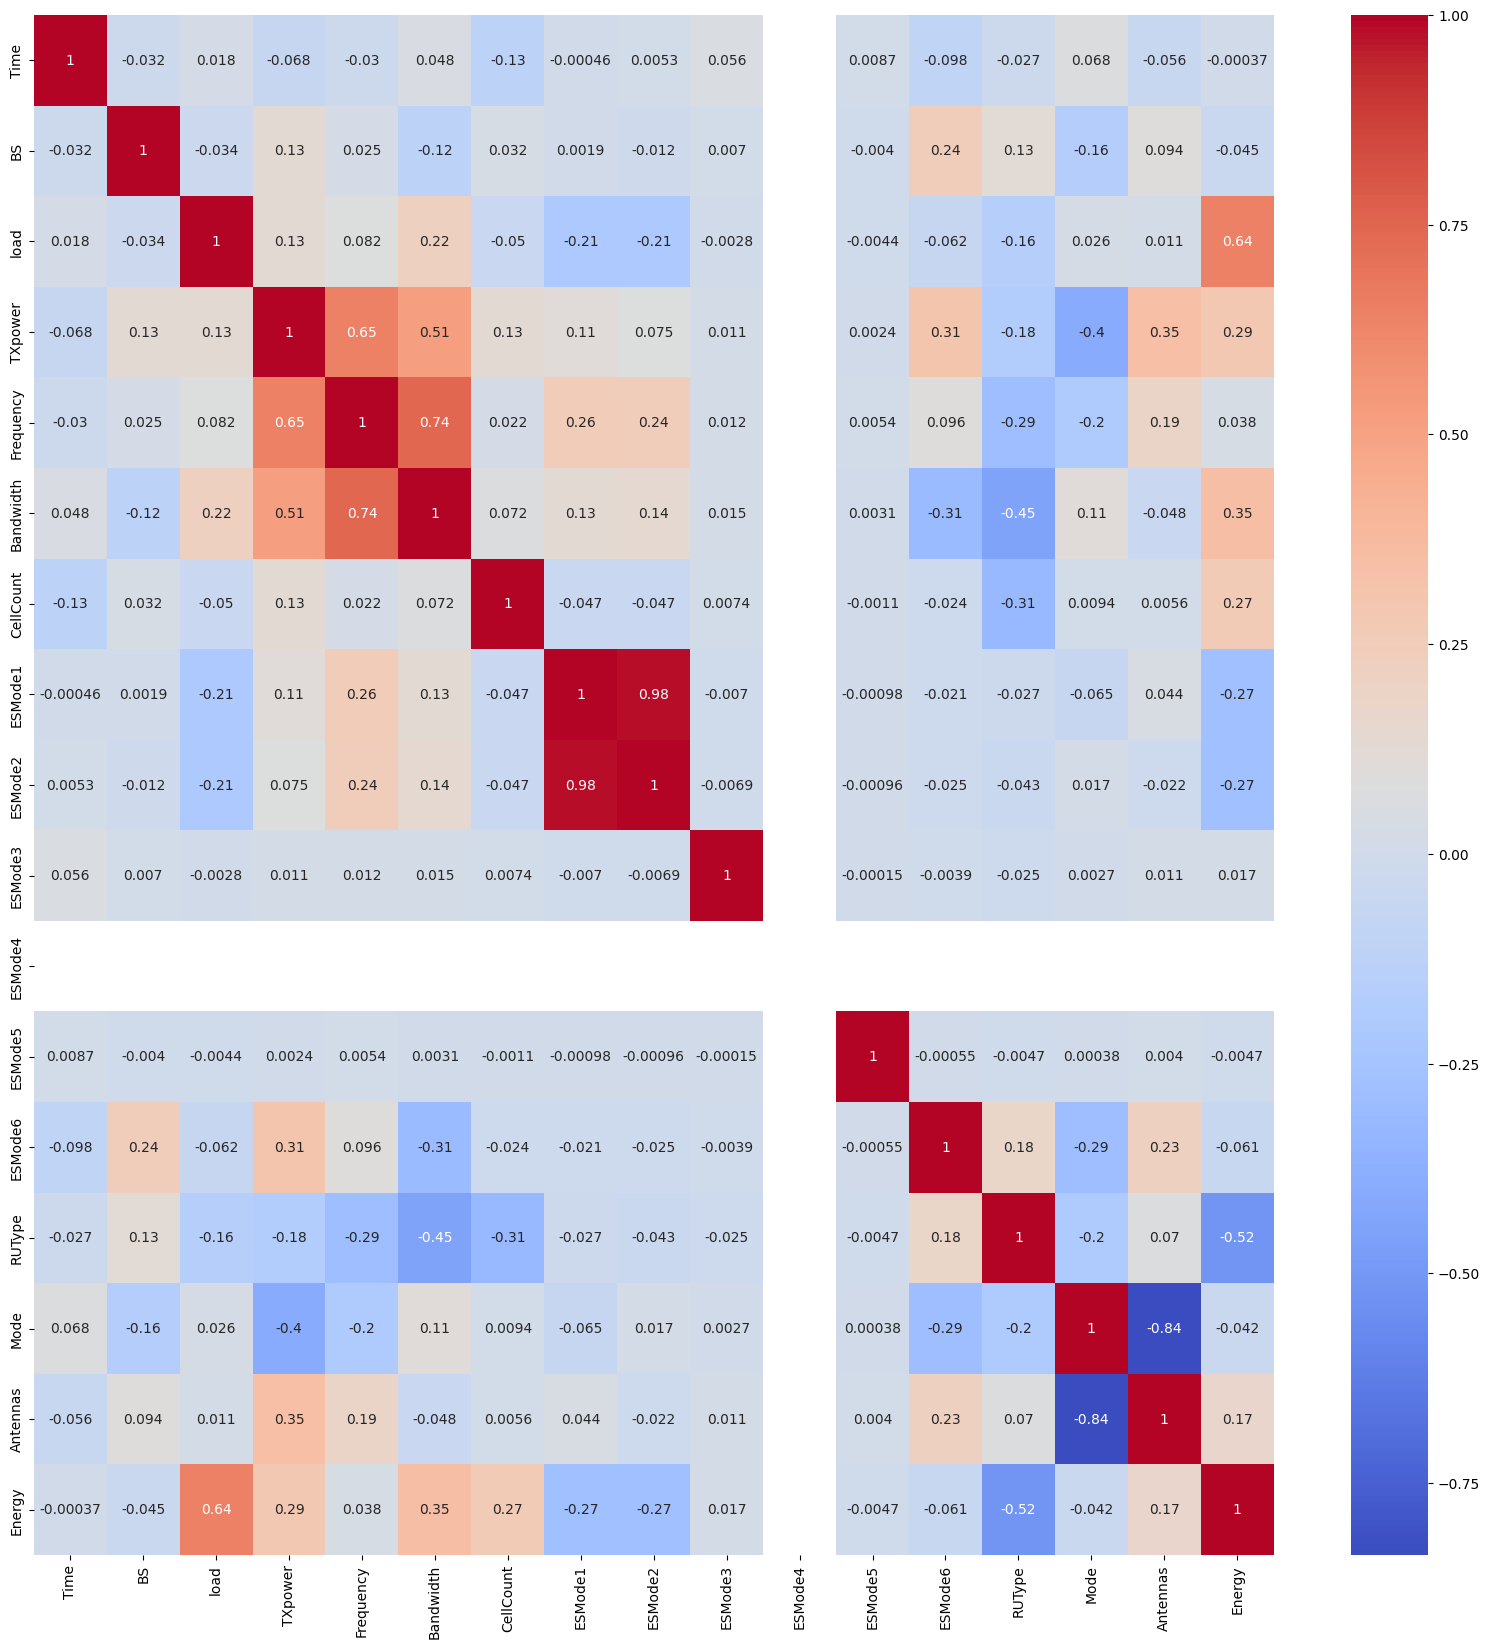

In [125]:
# sns correlation heatmap for dataset
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

In [61]:
submission = pd.read_csv('Dataset/SampleSubmission.csv')
submission= submission.drop(['Energy','w'], axis=1)

In [62]:
submission['Time'] = pd.to_datetime(submission['Time'], format='%Y-%d-%m %H:%M:%S')
submission['BS'] = submission['BS'].str.replace('B_', '').astype(int)
submission

,Time,BS
0,2023-01-01 06:00:00,0
1,2023-01-01 11:00:00,0
2,2023-01-01 12:00:00,0
3,2023-01-01 13:00:00,0
4,2023-01-01 23:00:00,0
...,...,...
26134,2023-02-01 19:00:00,1019
26135,2023-02-01 20:00:00,1019
26136,2023-02-01 21:00:00,1019
26137,2023-02-01 22:00:00,1019


In [136]:
pred = pd.merge(submission, e_aggregated_df, on=['Time', 'BS'], how='left')

In [137]:
pred = pred.drop(['Energy'], axis=1)

In [70]:
# pd.DataFrame.to_csv(dataset, 'Dataset/dataset.csv', index=False)
# pd.DataFrame.to_csv(predict_df, 'Dataset/pred.csv', index=False)

In [23]:
# import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Splitting the dataset
train_size = int(0.85 * len(dataset))
# val_size = int(0.15 * len(dataset))

train = dataset[:train_size]
val = dataset[train_size:]
# val = dataset[train_size:train_size+val_size]
# test = dataset[train_size+val_size:]

# Rename columns for Prophet
train = train.rename(columns={'Time': 'ds', 'Energy': 'y'})
val = val.rename(columns={'Time': 'ds', 'Energy': 'y'})

# Initialize the Prophet model and add regressors
model = Prophet()
extra_regressors = ['load', 'TXpower', 'Frequency', 'Bandwidth', 'CellCount', 
                    'ESMode1', 'ESMode2', 'ESMode3', 'ESMode4', 'ESMode5', 'ESMode6', 
                    'RUType', 'Mode', 'Antennas']

for reg in extra_regressors:
    model.add_regressor(reg)

# Train the model
model.fit(train)

# Make predictions on the validation set
future = model.make_future_dataframe(periods=len(val), freq='H', include_history=False)
for reg in extra_regressors:
    future[reg] = val[reg].values

forecast = model.predict(future)

# Calculate evaluation metrics
mae = mean_absolute_error(val['y'], forecast['yhat'])
mse = mean_squared_error(val['y'], forecast['yhat'])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

23:26:15 - cmdstanpy - INFO - Chain [1] start processing
23:26:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 10.711281887729184
Mean Squared Error (MSE): 166.6543606424206
Root Mean Squared Error (RMSE): 12.909467868290335


In [107]:
# dataset.set_index('Time', inplace=True)
resampled_df = dataset.resample('H')
resampled_df

AttributeError: 'DatetimeIndexResampler' object has no attribute 'reset_index'

17:33:34 - cmdstanpy - INFO - Chain [1] start processing
17:33:47 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 5000x1000 with 0 Axes>

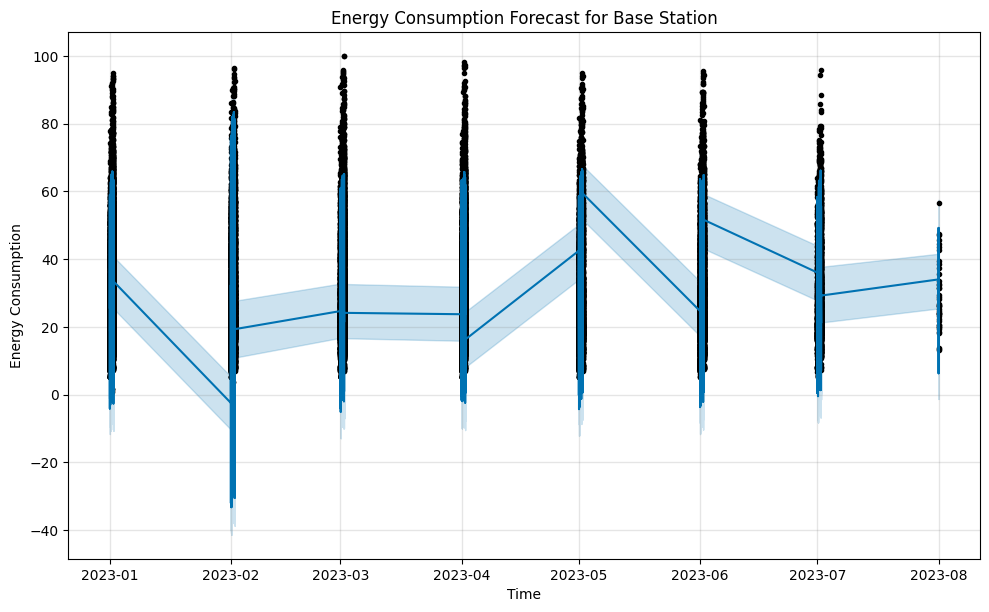

In [138]:
from prophet import Prophet

# Prepare dataset for Prophet
dataset_prophet = dataset.rename(columns={"Time": "ds", "Energy": "y"})

# Initialize the Prophet model
model = Prophet()

# Add additional regressors
regressors = ['BS', 'load', 'TXpower', 'Frequency', 'Bandwidth', 'CellCount', 
              'RUType', 'Mode', 'Antennas']
# regressors = ['BS', 'load', 'TXpower', 'Frequency', 'Bandwidth', 'CellCount', 
#               'ESMode1', 'ESMode2', 'ESMode3', 'ESMode4', 'ESMode5', 'ESMode6', 
#               'RUType', 'Mode', 'Antennas']

for reg in regressors:
    model.add_regressor(reg)

# Train the Prophet model
model.fit(dataset_prophet)

# Prepare the pred.csv data
pred_data_prophet = pred.rename(columns={"Time": "ds"})

# Make predictions
forecast = model.predict(pred_data_prophet)

plt.figure(figsize=(50, 10))
fig = model.plot(forecast)
plt.title(f'Energy Consumption Forecast for Base Station')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()

# The forecasted energy values will be in the 'yhat' column of the 'forecast' dataframe
predicted_energy = forecast['yhat']

02:14:33 - cmdstanpy - INFO - Chain [1] start processing
02:14:55 - cmdstanpy - INFO - Chain [1] done processing


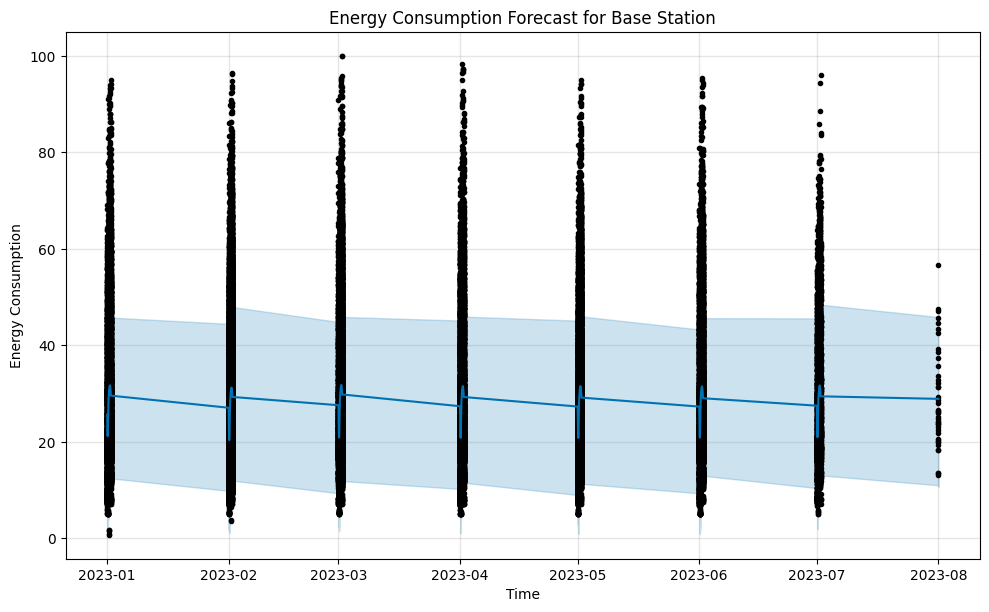

In [100]:
from prophet import Prophet

# Prepare dataset for Prophet
dataset_prophet = dataset.rename(columns={"Time": "ds", "Energy": "y"})

# Initialize the Prophet model
model = Prophet()

# model.add_regressor('BS')
# model.add_regressor('load')

# Train the Prophet model
model.fit(dataset_prophet)

# Prepare the pred.csv data
# pred_data_prophet = pred['Time'].rename(columns={"Time": "ds"})
# pred_data_prophet = pred[['Time', 'BS', 'load']].rename(columns={"Time": "ds"})
pred_data_prophet = pred.rename(columns={"Time": "ds"})

# Make predictions
forecast = model.predict(pred_data_prophet)

fig = model.plot(forecast)
plt.title(f'Energy Consumption Forecast for Base Station')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()

# The forecasted energy values will be in the 'yhat' column of the 'forecast' dataframe
predicted_energy = forecast['yhat']

In [139]:
sub= pd.DataFrame()
sub['Time']=pred['Time'].apply(lambda x: x.strftime('%Y-%d-%m %H:%M:%S')).astype(str) + '_B_' + pred['BS'].astype(str)
sub['Energy']=predicted_energy
sub

,Time,Energy
0,2023-01-01 06:00:00_B_0,25.679245
1,2023-01-01 11:00:00_B_0,28.725808
2,2023-01-01 12:00:00_B_0,20.323412
3,2023-01-01 13:00:00_B_0,32.451946
4,2023-01-01 23:00:00_B_0,18.406450
...,...,...
26134,2023-01-02 19:00:00_B_1019,44.335287
26135,2023-01-02 20:00:00_B_1019,30.322293
26136,2023-01-02 21:00:00_B_1019,28.892209
26137,2023-01-02 22:00:00_B_1019,49.213623


In [140]:
pd.DataFrame.to_csv(sub, 'Submissions/submission_04.csv', index=False)

In [16]:
aggregated_df.nunique()

Time           168
BS            1020
load         70554
TXpower         52
Frequency        8
Bandwidth        5
CellCount        3
ESMode1        564
ESMode2       1225
ESMode3        199
ESMode4          1
ESMode5          4
ESMode6       3926
RUType          12
Mode             2
Antennas         6
dtype: int64

In [205]:
df.nunique()

Time           168
BS            1020
load         70554
ESMode1        582
ESMode2       1234
ESMode3        223
ESMode4          1
ESMode5          4
ESMode6       7238
RUType          12
Mode             2
Frequency       10
Bandwidth        9
Antennas         8
TXpower         52
dtype: int64

In [200]:
df.nunique()

Time           168
BS            1020
load         70505
ESMode1        565
ESMode2       1234
ESMode3        223
ESMode4          1
ESMode5          4
ESMode6       7303
RUType          12
Mode             2
Frequency        9
Bandwidth        5
Antennas         6
TXpower         44
dtype: int64

In [167]:
cell_counts = esmodes.groupby(['BS', 'Time'])['CellName'].nunique().reset_index()
cell_counts.rename(columns={'CellName': 'TotalCells'}, inplace=True)
cell_counts

,BS,Time,TotalCells
0,B_0,1/1/2023 10:00,1
1,B_0,1/1/2023 11:00,1
2,B_0,1/1/2023 12:00,1
3,B_0,1/1/2023 13:00,1
4,B_0,1/1/2023 14:00,1
...,...,...,...
118763,B_999,1/2/2023 5:00,1
118764,B_999,1/2/2023 6:00,1
118765,B_999,1/2/2023 7:00,1
118766,B_999,1/2/2023 8:00,1


In [168]:
df = pd.merge(df, cell_counts, on=['BS', 'Time'], how='left')
df

,Time,BS,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,TotalCells
0,1/1/2023 10:00,B_0,0.624745,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1/1/2023 10:00,B_1,0.028090,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1/1/2023 10:00,B_10,0.020947,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1/1/2023 10:00,B_100,0.071930,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1/1/2023 10:00,B_101,0.016970,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
118763,1/8/2023 0:00,B_792,0.264580,0.0,0.0,0.0,0.0,0.0,0.0,1
118764,1/8/2023 0:00,B_793,0.095300,0.0,0.0,0.0,0.0,0.0,0.0,1
118765,1/8/2023 0:00,B_794,0.138851,0.0,0.0,0.0,0.0,0.0,0.0,1
118766,1/8/2023 0:00,B_795,0.537426,0.0,0.0,0.0,0.0,0.0,0.0,1


In [175]:
# dataframe = df.copy()
# dataframe['Time'] = pd.to_datetime(dataframe['Time'])
# dataframe = dataframe.sort_values(by='Time')
# dataframe

,Time,BS,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,TotalCells
8210,2023-01-01 01:00:00,B_0,0.487936,0.0,0.0,0.0,0.0,0.0,0.0,1
8744,2023-01-01 01:00:00,B_58,0.185720,0.0,0.0,0.0,0.0,0.0,0.0,1
8745,2023-01-01 01:00:00,B_580,0.442191,0.0,0.0,0.0,0.0,0.0,0.0,1
8746,2023-01-01 01:00:00,B_581,0.428680,0.0,0.0,0.0,0.0,0.0,0.0,1
8747,2023-01-01 01:00:00,B_582,0.275400,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
118733,2023-01-08 00:00:00,B_651,0.061280,0.0,0.0,0.0,0.0,0.0,0.0,1
118734,2023-01-08 00:00:00,B_652,0.378160,0.0,0.0,0.0,0.0,0.0,0.0,1
118735,2023-01-08 00:00:00,B_653,0.077360,0.0,0.0,0.0,0.0,0.0,0.0,1
118723,2023-01-08 00:00:00,B_599,0.536130,0.0,0.0,0.0,0.0,0.0,0.0,1


In [182]:
df_merged = pd.merge(df, energy, on=['Time', 'BS'], how='left')
df_merged

,Time,BS,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,TotalCells,Energy
0,1/1/2023 10:00,B_0,0.624745,0.0,0.0,0.0,0.0,0.0,0.0,1,72.645740
1,1/1/2023 10:00,B_1,0.028090,0.0,0.0,0.0,0.0,0.0,0.0,1,22.571001
2,1/1/2023 10:00,B_10,0.020947,0.0,0.0,0.0,0.0,0.0,0.0,1,31.240658
3,1/1/2023 10:00,B_100,0.071930,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
4,1/1/2023 10:00,B_101,0.016970,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
118763,1/8/2023 0:00,B_792,0.264580,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
118764,1/8/2023 0:00,B_793,0.095300,0.0,0.0,0.0,0.0,0.0,0.0,1,18.236173
118765,1/8/2023 0:00,B_794,0.138851,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
118766,1/8/2023 0:00,B_795,0.537426,0.0,0.0,0.0,0.0,0.0,0.0,1,47.234679


In [193]:

df_merged[df_merged['Energy'].isnull()]

,Time,BS,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,TotalCells,Energy
3,1/1/2023 10:00,B_100,0.071930,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
4,1/1/2023 10:00,B_101,0.016970,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
8,1/1/2023 10:00,B_105,0.166205,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN
11,1/1/2023 10:00,B_108,0.551320,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
21,1/1/2023 10:00,B_117,0.203220,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
118757,1/8/2023 0:00,B_786,0.455900,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
118761,1/8/2023 0:00,B_790,0.221300,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
118762,1/8/2023 0:00,B_791,0.132620,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
118763,1/8/2023 0:00,B_792,0.264580,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN


In [192]:
df_merged[df_merged['Time'] == "1/5/2023 2:00"]

,Time,BS,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,TotalCells,Energy
90484,1/5/2023 2:00,B_0,0.471777,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
90485,1/5/2023 2:00,B_1,0.024890,0.0,0.0,0.0,0.0,0.0,0.0,1,16.591928
90486,1/5/2023 2:00,B_10,0.009947,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
90487,1/5/2023 2:00,B_100,0.009390,0.0,0.0,0.0,0.0,0.0,0.0,1,15.844544
90488,1/5/2023 2:00,B_101,0.008620,0.0,0.0,0.0,0.0,0.0,0.0,1,15.396114
...,...,...,...,...,...,...,...,...,...,...,...
91182,1/5/2023 2:00,B_95,0.139420,0.0,0.0,0.0,0.0,0.0,0.0,1,20.029895
91183,1/5/2023 2:00,B_96,0.106700,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
91184,1/5/2023 2:00,B_97,0.742894,0.0,0.0,0.0,0.0,0.0,0.0,1,54.708520
91185,1/5/2023 2:00,B_98,0.013700,0.0,0.0,0.0,0.0,0.0,0.0,1,16.143498


Before new

In [89]:
merged_data = pd.merge(esmodes, energy, on=['BS', 'Time'], how='left')
merged_data = pd.merge(merged_data, baseStation, on=['BS', 'CellName'], how='left')
merged_data = merged_data.dropna()
merged_data

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0,64.275037,Type1,Mode2,365.00,20,4,6.875934
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0,55.904335,Type1,Mode2,365.00,20,4,6.875934
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0,57.698057,Type1,Mode2,365.00,20,4,6.875934
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0,55.156951,Type1,Mode2,365.00,20,4,6.875934
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0,56.053812,Type1,Mode2,365.00,20,4,6.875934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,0,0.0,0.0,60.837070,Type1,Mode2,426.98,2,2,6.877429
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,0,0.0,0.0,55.904335,Type1,Mode2,426.98,2,2,6.877429
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,0,0.0,0.0,61.883408,Type1,Mode2,426.98,2,2,6.877429
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,0,0.0,0.0,65.470852,Type1,Mode2,426.98,2,2,6.877429


In [119]:
temp = merged_data.groupby(['BS', 'CellName']).size().reset_index(name='counts')
temp = temp.groupby(['BS'])['counts'].sum().reset_index()
temp
# temp[temp['BS']=='B_105']
# temp['BS'].nunique()

,BS,counts
0,B_0,135
1,B_1,104
2,B_10,139
3,B_100,113
4,B_1003,21
...,...,...
918,B_995,20
919,B_996,19
920,B_997,20
921,B_998,18


In [91]:
cell_counts = merged_data.groupby(['BS', 'Time'])['CellName'].nunique().reset_index()
cell_counts.rename(columns={'CellName': 'Total_Cells'}, inplace=True)
cell_counts

,BS,Time,Total_Cells
0,B_0,1/1/2023 10:00,1
1,B_0,1/1/2023 14:00,1
2,B_0,1/1/2023 15:00,1
3,B_0,1/1/2023 16:00,1
4,B_0,1/1/2023 17:00,1
...,...,...,...
92624,B_999,1/2/2023 5:00,1
92625,B_999,1/2/2023 6:00,1
92626,B_999,1/2/2023 7:00,1
92627,B_999,1/2/2023 8:00,1


In [146]:
cell_counts['BS'].nunique()

923

In [100]:
agg_funcs = {col: 'max' for col in merged_data.columns if col not in ['BS', 'Time', 'load']}
agg_funcs['load'] = 'sum'
agg_data = merged_data.groupby(['BS', 'Time']).agg(agg_funcs).reset_index()

cell_counts = merged_data.groupby(['BS', 'Time'])['CellName'].nunique().reset_index()
cell_counts.rename(columns={'CellName': 'Total_Cells'}, inplace=True)

final_result = pd.merge(agg_data, cell_counts, on=['BS', 'Time'])
final_result
# The final_result dataframe will have the desired information


,BS,Time,CellName,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,load,Total_Cells
0,B_0,1/1/2023 10:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,72.645740,Type1,Mode2,365.00,20,4,6.875934,0.624745,1
1,B_0,1/1/2023 14:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,66.666667,Type1,Mode2,365.00,20,4,6.875934,0.437926,1
2,B_0,1/1/2023 15:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,67.563528,Type1,Mode2,365.00,20,4,6.875934,0.403457,1
3,B_0,1/1/2023 16:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,72.645740,Type1,Mode2,365.00,20,4,6.875934,0.428989,1
4,B_0,1/1/2023 17:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,88.041854,Type1,Mode2,365.00,20,4,6.875934,0.553500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92624,B_999,1/2/2023 5:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,9.865471,Type5,Mode2,426.98,2,1,6.875934,0.049673,1
92625,B_999,1/2/2023 6:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,10.014948,Type5,Mode2,426.98,2,1,6.875934,0.054962,1
92626,B_999,1/2/2023 7:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,10.313901,Type5,Mode2,426.98,2,1,6.875934,0.060288,1
92627,B_999,1/2/2023 8:00,Cell0,0.0,0.0,0.0,0,0.0,0.0,10.463378,Type5,Mode2,426.98,2,1,6.875934,0.066192,1


In [98]:
grouped=  merged_data.groupby(['Time', 'BS']).max().reset_index()
grouped['CellName'] = cell_counts['Total_Cells']
grouped.rename(columns={'CellName': 'TotalCells'}, inplace=True)

grouped['BS'] = grouped['BS'].str.replace('B_', '').astype(int)
# grouped['CellName'] = grouped['CellName'].str.replace('Cell', '').astype(int)
grouped['RUType'] = grouped['RUType'].str.replace('Type', '').astype(int)
grouped['Mode'] = grouped['Mode'].str.replace('Mode', '').astype(int)

grouped

,Time,BS,TotalCells,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,1/1/2023 10:00,0,1,0.624745,0.0,0.0,0.0,0,0.0,0.0,72.645740,1,2,365.0,20,4,6.875934
1,1/1/2023 10:00,1,1,0.028090,0.0,0.0,0.0,0,0.0,0.0,22.571001,2,2,532.0,20,4,6.875934
2,1/1/2023 10:00,10,1,0.020947,0.0,0.0,0.0,0,0.0,0.0,31.240658,1,2,365.0,20,2,6.875934
3,1/1/2023 10:00,102,1,0.107020,0.0,0.0,0.0,0,0.0,0.0,19.282511,6,2,189.0,10,2,6.427504
4,1/1/2023 10:00,103,1,0.084820,0.0,0.0,0.0,0,0.0,0.0,18.236173,6,2,189.0,10,2,6.427504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92624,1/8/2023 0:00,788,1,0.137090,0.0,0.0,0.0,0,0.0,0.0,22.421525,4,2,532.0,20,2,6.875934
92625,1/8/2023 0:00,789,1,0.321468,0.0,0.0,0.0,0,0.0,0.0,42.600897,1,2,365.0,20,2,6.875934
92626,1/8/2023 0:00,793,1,0.095300,0.0,0.0,0.0,0,0.0,0.0,18.236173,6,2,189.0,10,2,6.427504
92627,1/8/2023 0:00,795,1,0.537426,0.0,0.0,0.0,0,0.0,0.0,47.234679,1,2,365.0,20,2,6.875934


array([523, 524, 525, 526, 529, 530, 531, 533, 534, 535, 536, 537, 539,
        54, 540, 541, 542, 404, 405, 406, 408,  41, 410, 411, 412, 413,
       414, 415, 419,  42, 420, 423, 424, 425, 427,  43, 430, 431, 432,
       433])

In [62]:
print(merged_data.isna().sum())

Time         0
BS           0
CellName     0
load         0
ESMode1      0
ESMode2      0
ESMode3      0
ESMode4      0
ESMode5      0
ESMode6      0
Energy       0
RUType       0
Mode         0
Frequency    0
Bandwidth    0
Antennas     0
TXpower      0
dtype: int64


In [18]:
merged_data[merged_data['Energy'].isna()]

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
5,1/1/2023 6:00,B_0,Cell0,0.189872,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,365.00,20,4,6.875934
10,1/1/2023 11:00,B_0,Cell0,0.522096,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,365.00,20,4,6.875934
11,1/1/2023 12:00,B_0,Cell0,0.439968,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,365.00,20,4,6.875934
12,1/1/2023 13:00,B_0,Cell0,0.482723,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,365.00,20,4,6.875934
22,1/1/2023 23:00,B_0,Cell0,0.782511,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,365.00,20,4,6.875934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125534,1/2/2023 7:00,B_105,Cell3,0.089250,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,426.98,2,2,6.877429
125535,1/2/2023 8:00,B_105,Cell3,0.119096,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,426.98,2,2,6.877429
125538,1/2/2023 11:00,B_105,Cell3,0.070423,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,426.98,2,2,6.877429
125547,1/2/2023 20:00,B_105,Cell3,0.165231,0.0,0.0,0.0,0,0.0,0.0,NaN,Type1,Mode2,426.98,2,2,6.877429


In [60]:
grouped = merged_data.groupby(['Time', 'BS', 'CellName']).nunique().reset_index()
grouped[grouped != 1]

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Energy,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,1/1/2023 10:00,B_0,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2023 10:00,B_1,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2023 10:00,B_10,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2023 10:00,B_100,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2023 10:00,B_101,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/8/2023 0:00,B_792,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
125571,1/8/2023 0:00,B_793,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125572,1/8/2023 0:00,B_794,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
125573,1/8/2023 0:00,B_795,Cell0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Earlier

In [4]:
esmodes.drop(['ESMode3','ESMode4','ESMode5'], axis=1, inplace=True)
esmodes

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0
...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0


In [16]:
temp_df = pd.merge(esmodes, baseStation, on=['BS','CellName'], how='inner')
temp_df


,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,Type1,Mode2,365.00,20,4,6.875934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,Type1,Mode2,426.98,2,2,6.877429


In [19]:
df = pd.merge(temp_df, energy, on=['Time','BS'], how='outer')
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,64.275037
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,55.904335
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,57.698057
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,55.156951
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_1019,Cell0,0.019940,0.0,0.0,0.627736,Type11,Mode1,697.002,10,2,7.086398,NaN
125571,1/2/2023 20:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN
125572,1/2/2023 21:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN
125573,1/2/2023 22:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN


In [22]:
df.isnull().sum()

Time             0
BS               0
CellName         0
load             0
ESMode1          0
ESMode2          0
ESMode6          0
RUType           0
Mode             0
Frequency        0
Bandwidth        0
Antennas         0
TXpower          0
Energy       27491
dtype: int64

In [23]:
df[df['Energy'].isnull()]

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
5,1/1/2023 6:00,B_0,Cell0,0.189872,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
10,1/1/2023 11:00,B_0,Cell0,0.522096,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
11,1/1/2023 12:00,B_0,Cell0,0.439968,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
12,1/1/2023 13:00,B_0,Cell0,0.482723,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
22,1/1/2023 23:00,B_0,Cell0,0.782511,0.0,0.0,0.000000,Type1,Mode2,365.000,20,4,6.875934,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_1019,Cell0,0.019940,0.0,0.0,0.627736,Type11,Mode1,697.002,10,2,7.086398,NaN
125571,1/2/2023 20:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN
125572,1/2/2023 21:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN
125573,1/2/2023 22:00,B_1019,Cell0,0.019940,0.0,0.0,0.627909,Type11,Mode1,697.002,10,2,7.086398,NaN


In [24]:
# Try something else later, other than droping, if possible.

df.dropna(inplace=True)
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,64.275037
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,55.904335
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,57.698057
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,55.156951
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.000000,Type1,Mode2,365.00,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125544,1/2/2023 17:00,B_1018,Cell0,0.087538,0.0,0.0,0.781566,Type5,Mode2,426.98,2,2,7.325859,14.648729
125545,1/2/2023 18:00,B_1018,Cell0,0.082635,0.0,0.0,0.804310,Type5,Mode2,426.98,2,2,7.325859,14.648729
125548,1/2/2023 21:00,B_1018,Cell0,0.055538,0.0,0.0,0.846935,Type5,Mode2,426.98,2,2,7.325859,13.452915
125549,1/2/2023 22:00,B_1018,Cell0,0.058077,0.0,0.0,0.856434,Type5,Mode2,426.98,2,2,7.325859,13.602392


In [25]:
df_backup = df.copy()

In [44]:
df=df_backup.copy()

In [45]:
df['Time'] = pd.to_datetime(df['Time'])
df['BS'] = df['BS'].str.replace('B_', '').astype(int)
df['CellName'] = df['CellName'].str.replace('Cell', '').astype(int)
df['RUType'] = df['RUType'].str.replace('Type', '').astype(int)
df['Mode'] = df['Mode'].str.replace('Mode', '').astype(int)
df

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,2023-01-01 01:00:00,0,0,0.487936,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,64.275037
1,2023-01-01 02:00:00,0,0,0.344468,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.904335
2,2023-01-01 03:00:00,0,0,0.193766,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,57.698057
3,2023-01-01 04:00:00,0,0,0.222383,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.156951
4,2023-01-01 05:00:00,0,0,0.175436,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125544,2023-01-02 17:00:00,1018,0,0.087538,0.0,0.0,0.781566,5,2,426.98,2,2,7.325859,14.648729
125545,2023-01-02 18:00:00,1018,0,0.082635,0.0,0.0,0.804310,5,2,426.98,2,2,7.325859,14.648729
125548,2023-01-02 21:00:00,1018,0,0.055538,0.0,0.0,0.846935,5,2,426.98,2,2,7.325859,13.452915
125549,2023-01-02 22:00:00,1018,0,0.058077,0.0,0.0,0.856434,5,2,426.98,2,2,7.325859,13.602392


In [46]:
df = df[df['CellName'] == 0]
df.drop(['CellName'], axis=1, inplace=True)
df

C:\Users\nadil\AppData\Local\Temp\ipykernel_7328\709719012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['CellName'], axis=1, inplace=True)


,Time,BS,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,2023-01-01 01:00:00,0,0.487936,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,64.275037
1,2023-01-01 02:00:00,0,0.344468,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.904335
2,2023-01-01 03:00:00,0,0.193766,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,57.698057
3,2023-01-01 04:00:00,0,0.222383,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.156951
4,2023-01-01 05:00:00,0,0.175436,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125544,2023-01-02 17:00:00,1018,0.087538,0.0,0.0,0.781566,5,2,426.98,2,2,7.325859,14.648729
125545,2023-01-02 18:00:00,1018,0.082635,0.0,0.0,0.804310,5,2,426.98,2,2,7.325859,14.648729
125548,2023-01-02 21:00:00,1018,0.055538,0.0,0.0,0.846935,5,2,426.98,2,2,7.325859,13.452915
125549,2023-01-02 22:00:00,1018,0.058077,0.0,0.0,0.856434,5,2,426.98,2,2,7.325859,13.602392


In [47]:
df.head(70)

,Time,BS,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,2023-01-01 01:00:00,0,0.487936,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,64.275037
1,2023-01-01 02:00:00,0,0.344468,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,55.904335
2,2023-01-01 03:00:00,0,0.193766,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,57.698057
3,2023-01-01 04:00:00,0,0.222383,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,55.156951
4,2023-01-01 05:00:00,0,0.175436,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2023-01-04 01:00:00,0,0.502840,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,63.976084
98,2023-01-04 03:00:00,0,0.273872,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,57.698057
100,2023-01-04 06:00:00,0,0.216628,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,56.801196
101,2023-01-04 07:00:00,0,0.217532,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,61.883408


In [51]:
df_train = df[df['Time'] < '2023-01-06']
df_train

,Time,BS,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
0,2023-01-01 01:00:00,0,0.487936,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,64.275037
1,2023-01-01 02:00:00,0,0.344468,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.904335
2,2023-01-01 03:00:00,0,0.193766,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,57.698057
3,2023-01-01 04:00:00,0,0.222383,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,55.156951
4,2023-01-01 05:00:00,0,0.175436,0.0,0.0,0.000000,1,2,365.00,20,4,6.875934,56.053812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125544,2023-01-02 17:00:00,1018,0.087538,0.0,0.0,0.781566,5,2,426.98,2,2,7.325859,14.648729
125545,2023-01-02 18:00:00,1018,0.082635,0.0,0.0,0.804310,5,2,426.98,2,2,7.325859,14.648729
125548,2023-01-02 21:00:00,1018,0.055538,0.0,0.0,0.846935,5,2,426.98,2,2,7.325859,13.452915
125549,2023-01-02 22:00:00,1018,0.058077,0.0,0.0,0.856434,5,2,426.98,2,2,7.325859,13.602392


In [49]:
df_test = df[df['Time'] >= '2023-01-06']
df_test

,Time,BS,load,ESMode1,ESMode2,ESMode6,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower,Energy
134,2023-01-06 00:00:00,0,0.653223,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,67.713004
135,2023-01-06 03:00:00,0,0.186117,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,55.605381
136,2023-01-06 04:00:00,0,0.174638,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,52.017937
137,2023-01-06 05:00:00,0,0.119543,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,53.662182
139,2023-01-06 07:00:00,0,0.317245,0.0,0.0,0.0,1,2,365.0,20,4,6.875934,80.866966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120721,2023-01-07 11:00:00,820,0.396190,0.0,0.0,0.0,1,2,365.0,20,2,6.875934,43.497758
120723,2023-01-07 17:00:00,820,0.618800,0.0,0.0,0.0,1,2,365.0,20,2,6.875934,48.281016
120724,2023-01-07 18:00:00,820,0.694690,0.0,0.0,0.0,1,2,365.0,20,2,6.875934,52.914798
120725,2023-01-07 19:00:00,820,0.788790,0.0,0.0,0.0,1,2,365.0,20,2,6.875934,51.270553


In [63]:
df_train['Time'].max()

Timestamp('2023-01-05 23:00:00')

In [59]:
df_train_plot = df_train[['Time','Energy']]
df_train_plot

,Time,Energy
0,2023-01-01 01:00:00,64.275037
1,2023-01-01 02:00:00,55.904335
2,2023-01-01 03:00:00,57.698057
3,2023-01-01 04:00:00,55.156951
4,2023-01-01 05:00:00,56.053812
...,...,...
125544,2023-01-02 17:00:00,14.648729
125545,2023-01-02 18:00:00,14.648729
125548,2023-01-02 21:00:00,13.452915
125549,2023-01-02 22:00:00,13.602392


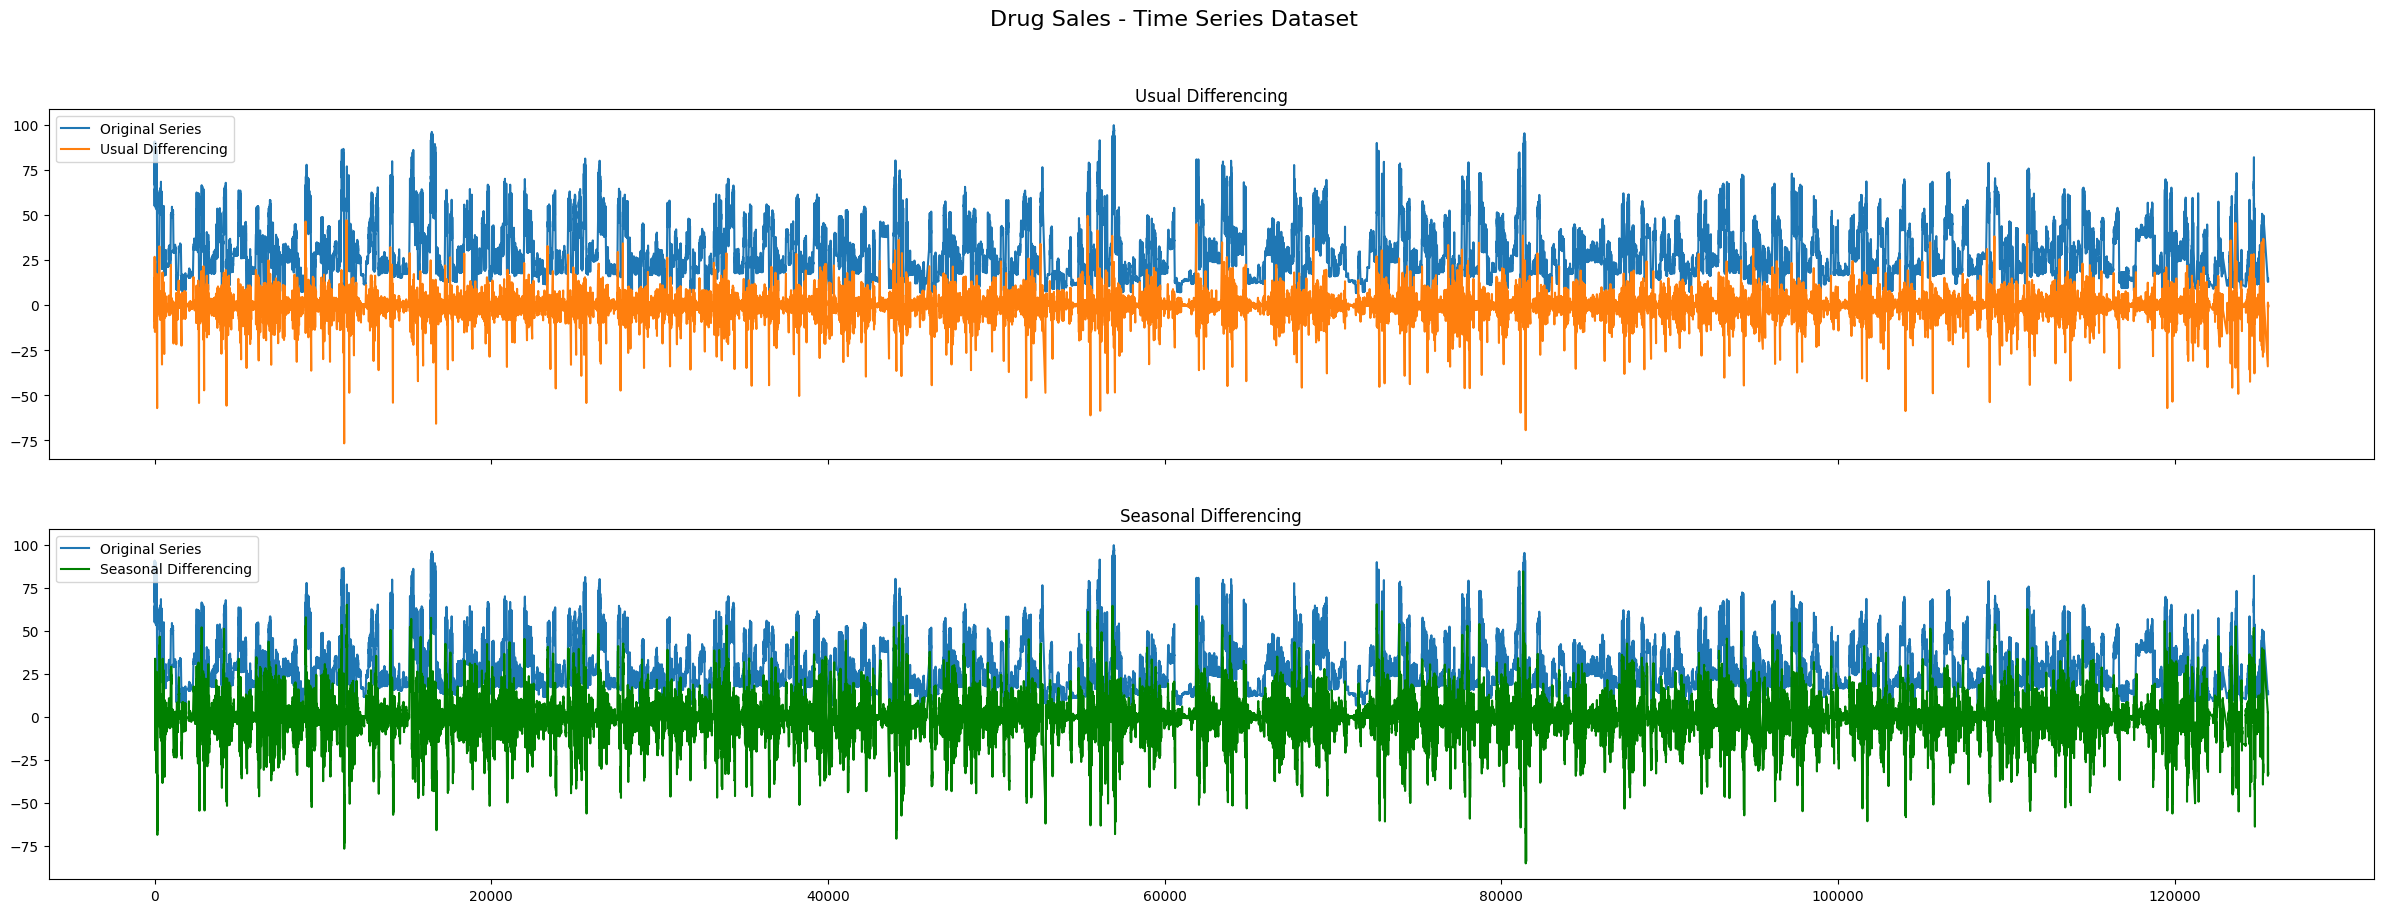

In [88]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(30,10), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_train_plot.Energy, label='Original Series')
axes[0].plot(df_train_plot.Energy.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(df_train_plot.Energy, label='Original Series')
axes[1].plot(df_train_plot.Energy.diff(24), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

In [89]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [90]:
smodel = pm.auto_arima(df_train_plot, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

In [91]:
model = ARIMA(df_train_plot, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
model.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

In [94]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train_plot, order=(2, 1, 1))

# Fit the model to the training data
# model_fit = model.fit()

# # Forecast future values
# forecast = model_fit.forecast(steps=len(df_train_plot))

# # Print the forecasted values
# print(forecast)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).